Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 0.427
Epoch: 0002 Avg. cost = 0.165
Epoch: 0003 Avg. cost = 0.112
Epoch: 0004 Avg. cost = 0.088
Epoch: 0005 Avg. cost = 0.073
Epoch: 0006 Avg. cost = 0.060
Epoch: 0007 Avg. cost = 0.054
Epoch: 0008 Avg. cost = 0.044
Epoch: 0009 Avg. cost = 0.042
Epoch: 0010 Avg. cost = 0.038
Epoch: 0011 Avg. cost = 0.033
Epoch: 0012 Avg. cost = 0.031
Epoch: 0013 Avg. cost = 0.028
Epoch: 0014 Avg. cost = 0.028
Epoch: 0015 Avg. cost = 0.024
완료!
정확도: 98.26


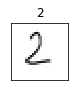

In [13]:
import tensorflow as tf

import numpy as np

import matplotlib.pyplot as plt
from PIL import Image
from numpy import *

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)
 
%matplotlib inline
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
 
keep_prob = tf.placeholder(tf.float32)
 
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
b1 = tf.Variable(tf.random_normal([256], stddev=0.01))
L1 = tf.add(tf.matmul(X, W1), b1)
L1 = tf.nn.relu(L1)
L1 = tf.nn.dropout(L1, keep_prob)
 
W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
b2 = tf.Variable(tf.random_normal([256], stddev=0.01))
L2 = tf.add(tf.matmul(L1, W2), b2)
L2 = tf.nn.relu(L2)
L2 = tf.nn.dropout(L2, keep_prob)
 
W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
b3 = tf.Variable(tf.random_normal([10], stddev=0.01))
model = tf.add(tf.matmul(L2, W3), b3)
 
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    labels=Y, logits=model
))
 
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
 
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
 
    batch_size = 100
    total_batch = int(mnist.train.num_examples / batch_size)
 
    for epoch in range(15):
        total_cost = 0
 
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
 
            _, cost_val = sess.run([optimizer, cost],
                feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 0.8})
 
            total_cost += cost_val
 
        print('Epoch:', '%04d' % (epoch + 1),
            'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))
 
    print('완료!')
 
    is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    print('정확도: %.2f' % sess.run(accuracy * 100,
        feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))
    
    im=Image.open("./mmd/MNIST_test_image.jpg")
    img = array(im.resize((28, 28), Image.ANTIALIAS).convert("L"))
    data = img.reshape([1, 784])
    
    labels = sess.run(model,
        feed_dict={X: data, Y: array([[0,0,1,0,0,0,0,0,0,0]]), keep_prob: 1})
 
    fig = plt.figure()
 
    for i in range(1):
        # 2x5 그리드에 i+1번째 subplot을 추가하고 얻어옴
        subplot = fig.add_subplot(2, 5, i + 1)
 
        # x, y 축의 지점 표시를 안함
        subplot.set_xticks([])
        subplot.set_yticks([])
 
        # subplot의 제목을 i번째 결과에 해당하는 숫자로 설정
        subplot.set_title('%d' % np.argmax(labels[i]))
 
        # 입력으로 사용한 i번째 테스트 이미지를 28x28로 재배열하고
        # 이 2차원 배열을 그레이스케일 이미지로 출력
        subplot.imshow(data.reshape((28, 28)),
            cmap=plt.cm.gray_r)
 
    plt.show()

In [9]:
array([0,0,0,0,0,0,0,0,0,0])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
mnist.test.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
mnist.test.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     